Twitter Sentiment Analysis



```
```



Import Required Lib

In [55]:
import re
import csv
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from nltk.corpus import stopwords

Importing Data

In [56]:

df=pd.read_excel("twitter5000.xlsx")
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


EDA

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5001 non-null   int64 
 1   ids     5001 non-null   int64 
 2   date    5001 non-null   object
 3   flag    5001 non-null   object
 4   user    5001 non-null   object
 5   text    5000 non-null   object
dtypes: int64(2), object(4)
memory usage: 234.5+ KB


In [58]:
print('shape of train dataset',df.shape)
df.target.value_counts()

shape of train dataset (5001, 6)


0    3000
4    2001
Name: target, dtype: int64

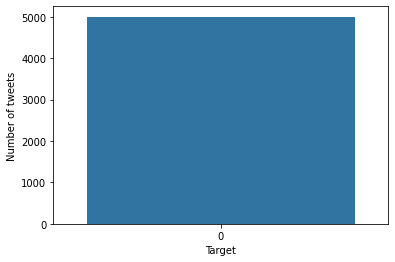

In [59]:

sns.countplot(df.target,)
plt.xlabel('Target')
plt.ylabel('Number of tweets')
plt.show()

Preprocessing of data(Removing of unwanted variables, url,numbers,special characters,symbools,white spcace etc..)

In [60]:
df = df.drop(["ids","date","flag","user"], axis=1)

In [61]:
df['text'] = df['text'].astype(str)

In [62]:
df['text'] = df['text'].apply(lambda x: re.sub(r'http\S+', '', x))

In [63]:
df['text'] = df['text'].apply(lambda x: re.sub(r'@\w+', '', x))

In [64]:
df['text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [65]:
df['text'] = df['text'].apply(lambda x: re.sub(r'\d+', '', x))

In [66]:
df['text'] = df['text'].apply(lambda x: re.sub(r'\s+', ' ', x))

In [67]:
df['text'] = df['text'].str.lower()

In [68]:
df.head()

,target,text
0,0,awww thats a bummer you shoulda got david car...
1,0,is upset that he cant update his facebook by t...
2,0,i dived many times for the ball managed to sa...
3,0,my whole body feels itchy and like its on fire
4,0,no its not behaving at all im mad why am i he...


Removing stop words

In [69]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [70]:
from nltk.corpus import stopwords

In [71]:
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
df.head()

,target,text
0,0,awww thats bummer shoulda got david carr third...
1,0,upset cant update facebook texting might cry r...
2,0,dived many times ball managed save rest go bounds
3,0,whole body feels itchy like fire
4,0,behaving im mad cant see


Streaming

In [72]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [73]:
# Import necessary libraries for streaming
from nltk.tokenize import word_tokenize

from nltk.stem import PorterStemmer

# Define the Porter stemmer
stemmer = PorterStemmer()
df['text'] = df['text'].astype(str)

# Stream the text data
df['text'] = df['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))


df.head()

,target,text
0,0,awww that bummer shoulda got david carr third day
1,0,upset cant updat facebook text might cri resul...
2,0,dive mani time ball manag save rest go bound
3,0,whole bodi feel itchi like fire
4,0,behav im mad cant see


lemmatization

In [74]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [75]:
# Import necessary libraries for lemmatization
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Define the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].astype(str)

# Stream the text data and perform lemmatization
df['text'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))

df.head()


,target,text
0,0,awww that bummer shoulda got david carr third day
1,0,upset cant updat facebook text might cri resul...
2,0,dive mani time ball manag save rest go bound
3,0,whole bodi feel itchi like fire
4,0,behav im mad cant see


Tokenization

In [76]:
# Import necessary libraries for tokenization
from nltk.tokenize import word_tokenize

# Tokenize the text data
df['text'] = df['text'].apply(lambda x: word_tokenize(x))
df.head()


,target,text
0,0,"[awww, that, bummer, shoulda, got, david, carr..."
1,0,"[upset, cant, updat, facebook, text, might, cr..."
2,0,"[dive, mani, time, ball, manag, save, rest, go..."
3,0,"[whole, bodi, feel, itchi, like, fire]"
4,0,"[behav, im, mad, cant, see]"


Word Counts

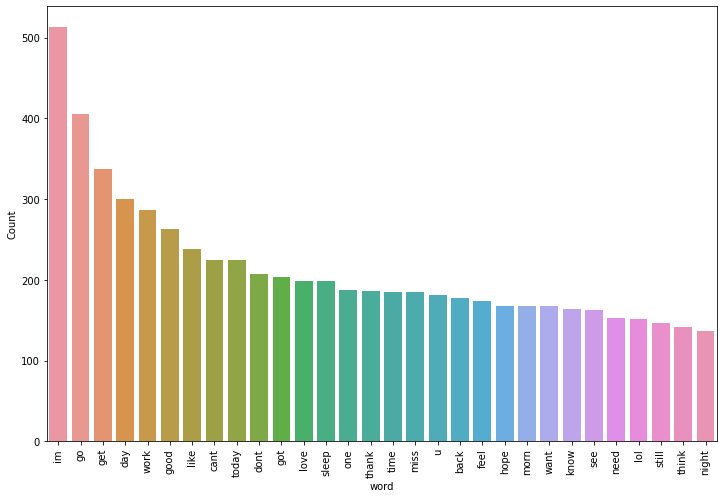

In [77]:
from nltk import FreqDist
import matplotlib.pyplot as plt

# Concatenate all tokenized words into a single list
all_words = [word for tokens in df['text'] for word in tokens]

# Create frequency distribution of the words
freq_dist = FreqDist(all_words)

# Create dataframe of top 30 most frequent words
words_df = pd.DataFrame({'word': list(freq_dist.keys()), 'count': list(freq_dist.values())})
words_df = words_df.nlargest(columns="count", n=30)

# Create bar plot of top 30 most frequent words
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=words_df, x='word', y='count')
ax.set(ylabel='Count')
plt.xticks(rotation='vertical')
plt.show()


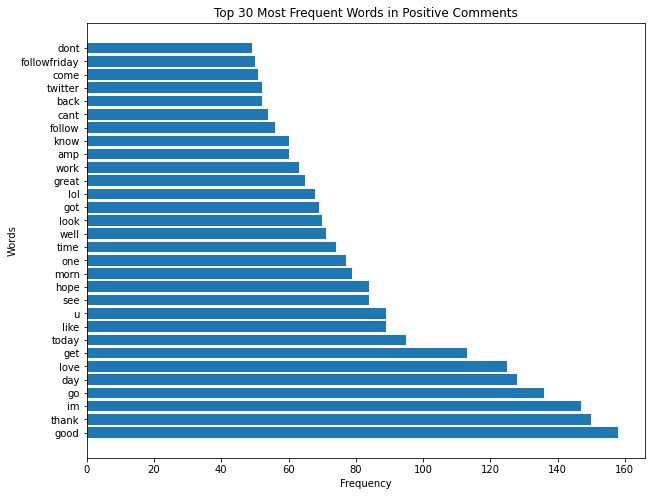

In [78]:
from collections import Counter
positive_comments = df[df['target']==4]['text'].tolist()

# Flatten the list of lists into a single list
positive_words = [word for comment in positive_comments for word in comment]

# Remove stop words from positive words list
positive_words = [word for word in positive_words if word not in stop_words]

# Get the count of each word in positive words list
word_count = Counter(positive_words)

# Extract top 30 most frequent words
top_words = word_count.most_common(30)

# Create a bar plot of top 30 most frequent words
plt.figure(figsize=(10,8))
plt.barh([word[0] for word in top_words], [count[1] for count in top_words])
plt.title('Top 30 Most Frequent Words in Positive Comments')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

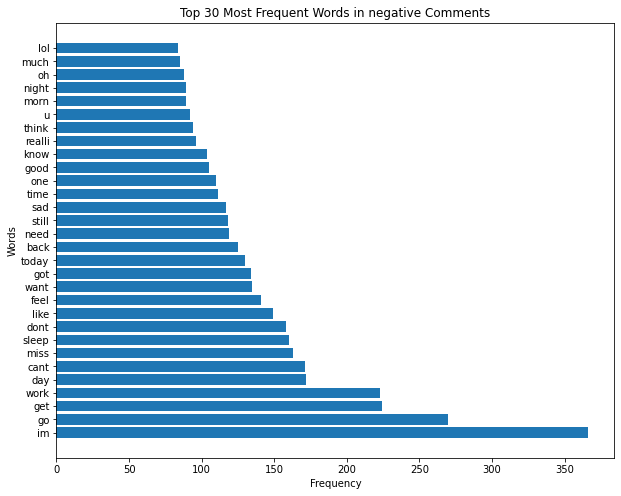

In [79]:
negative_comments = df[df['target']==0]['text'].tolist()

# Flatten the list of lists into a single list
negative_words = [word for comment in negative_comments for word in comment]

# Remove stop words from negative words list
negative_words = [word for word in negative_words if word not in stop_words]

# Get the count of each word in negative words list
word_count = Counter(negative_words)

# Extract top 30 most frequent words
top_words = word_count.most_common(30)

# Create a bar plot of top 30 most frequent words
plt.figure(figsize=(10,8))
plt.barh([word[0] for word in top_words], [count[1] for count in top_words])
plt.title('Top 30 Most Frequent Words in negative Comments')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

Wordcloud

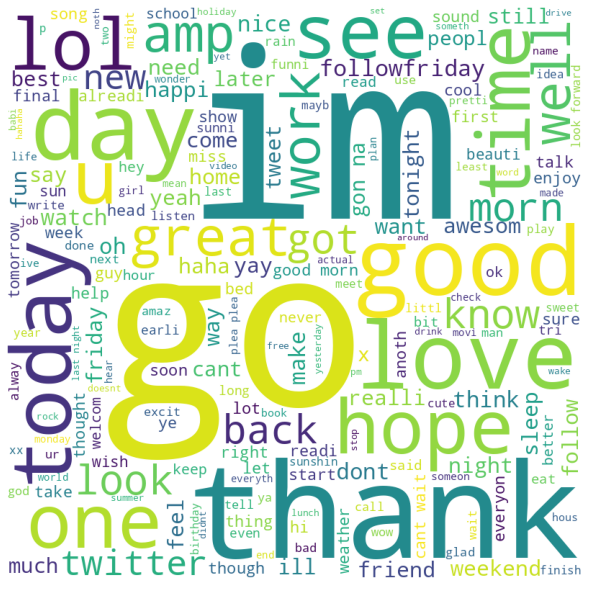

In [80]:
from wordcloud import WordCloud

# Subset positive comments
pos_comments = df[df['target']==4]['text']

# Convert the list of words in each comment to a single string separated by spaces
pos_comments_str = ' '.join([' '.join(comment) for comment in pos_comments])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(pos_comments_str)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


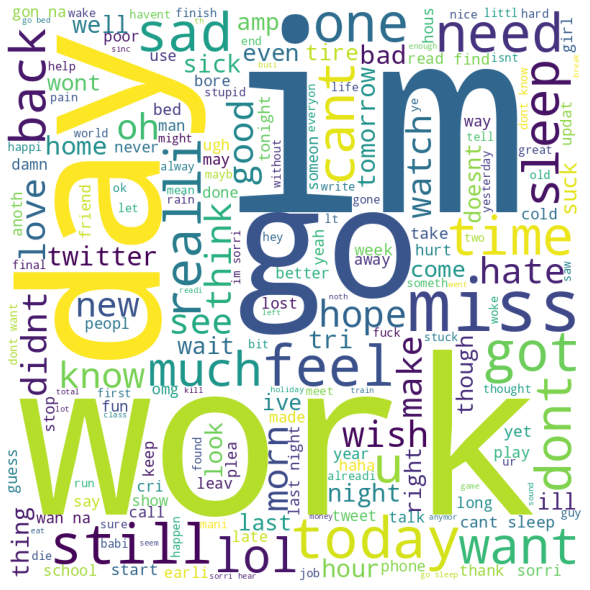

In [81]:
from wordcloud import WordCloud

# Subset negative comments
neg_comments = df[df['target']==0]['text']

# Convert the list of words in each comment to a single string separated by spaces
neg_comments_str = ' '.join([' '.join(comment) for comment in neg_comments])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(neg_comments_str)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


Model preparation

In [82]:
df['text'] = df['text'].apply(lambda x: ' '.join(x))

In [83]:
x=df['text']
y=df['target']

In [84]:
transfor=TfidfVectorizer()
x=transfor.fit_transform(x)

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=2)

In [86]:
x_train.shape

(4000, 7508)

Decision Tree Classifier

In [87]:

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)


0.6373626373626373

In [90]:
from sklearn.model_selection import cross_val_score
cross_val_score(dt,x,y,cv=5).mean()

0.6602637362637364

In [92]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = dt.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The model accuracy is", accuracy )
     

[[390 214]
 [149 248]]
The model accuracy is 0.6373626373626373


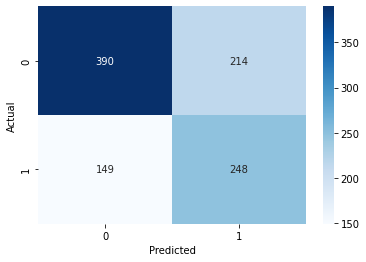

In [93]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate predictions using the trained model
y_pred = dt.predict(x_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Logistic Regression

In [94]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
#score of the model
log_reg.score(x_test,y_test)

0.7302697302697303

In [95]:
from sklearn.model_selection import cross_val_score
cross_val_score(log_reg,x,y,cv=5).mean()

0.7238565434565434

In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = log_reg.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The model accuracy is", accuracy )
     

[[549  55]
 [215 182]]
The model accuracy is 0.7302697302697303


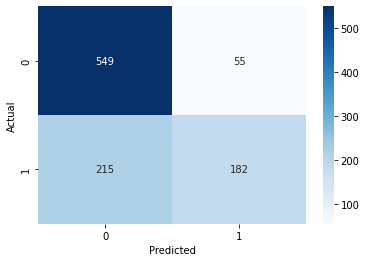

In [97]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate predictions using the trained model
y_pred = log_reg.predict(x_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


AdaBoost

In [98]:


from sklearn.ensemble import AdaBoostClassifier
ac = AdaBoostClassifier(n_estimators=100)
ac.fit(x_train,y_train)
ac.score(x_test,y_test)

     

0.6793206793206793

In [99]:
from sklearn.model_selection import cross_val_score
cross_val_score(ac,x,y,cv=5).mean()

0.681260939060939

In [100]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = ac.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The model accuracy is", accuracy )
     

[[524  80]
 [241 156]]
The model accuracy is 0.6793206793206793


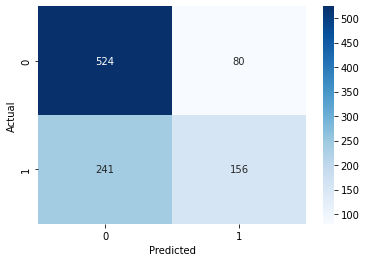

In [101]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate predictions using the trained model
y_pred = ac.predict(x_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


GradientBoosting Clssifier

In [102]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb.score(x_test,y_test)

0.6673326673326674

In [103]:
from sklearn.model_selection import cross_val_score
cross_val_score(ac,x,y,cv=5).mean()

0.681060939060939

In [104]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = gb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The model accuracy is", accuracy )
     

[[552  52]
 [281 116]]
The model accuracy is 0.6673326673326674


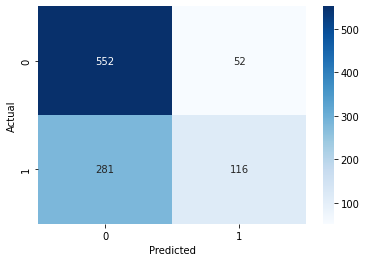

In [105]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate predictions using the trained model
y_pred = gb.predict(x_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


logistic regression  has higest accuracy.